In [2]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# read in data
raw_data = pd.read_csv('../data/raw/Bos_crime_2023.csv')




### Week2 EXPLORE DATASET

In [3]:
# print head of data
print(raw_data.head())


   _id INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0    1       232006462          1107                 NaN   
1    2       232000093          1402                 NaN   
2    3       232003336          3115                 NaN   
3    4       232011306          3115                 NaN   
4    5       232000104          3831                 NaN   

                     OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING  \
0                  FRAUD - IMPERSONATION      E13            574         0   
1                              VANDALISM       C6            200         0   
2                     INVESTIGATE PERSON       B3            466         0   
3                     INVESTIGATE PERSON       B2            282         0   
4  M/V - LEAVING SCENE - PROPERTY DAMAGE      E13            579         0   

         OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2023-01-01 00:00:00+00  2023      1      Sunday     0       NaN   
1  2023-01-01 00:01:00+00  202

In [4]:
# explore data
print(raw_data.describe())
print(raw_data.info())

                _id  OFFENSE_CODE  OFFENSE_CODE_GROUP      SHOOTING  \
count  81133.000000  81133.000000                 0.0  81133.000000   
mean   40567.000000   2340.595861                 NaN      0.008073   
std    23421.224032   1175.333353                 NaN      0.089488   
min        1.000000    111.000000                 NaN      0.000000   
25%    20284.000000   1106.000000                 NaN      0.000000   
50%    40567.000000   2907.000000                 NaN      0.000000   
75%    60850.000000   3201.000000                 NaN      0.000000   
max    81133.000000   3831.000000                 NaN      1.000000   

               YEAR         MONTH          HOUR  UCR_PART           Lat  \
count  81133.000000  81133.000000  81133.000000       0.0  7.528700e+04   
mean    2023.044261      6.361481     12.486411       NaN  4.232312e+01   
std        0.205675      3.530441      6.564979       NaN  1.576223e-01   
min     2023.000000      1.000000      0.000000       NaN  1

In [5]:
# print all types of OFFENSE_DESCRIPTION
print(raw_data['OFFENSE_DESCRIPTION'].unique())

['FRAUD - IMPERSONATION' 'VANDALISM' 'INVESTIGATE PERSON'
 'M/V - LEAVING SCENE - PROPERTY DAMAGE'
 'LARCENY THEFT FROM MV - NON-ACCESSORY' 'M/V ACCIDENT - PERSONAL INJURY'
 'THREATS TO DO BODILY HARM' 'SICK ASSIST - DRUG RELATED ILLNESS'
 'FRAUD - WELFARE' 'M/V ACCIDENT - OTHER' 'SICK ASSIST' 'VERBAL DISPUTE'
 'INVESTIGATE PROPERTY' 'ASSAULT - SIMPLE' 'BURGLARY - RESIDENTIAL'
 'TOWED MOTOR VEHICLE' 'ASSAULT - AGGRAVATED'
 'PROPERTY - LOST THEN LOCATED' 'HARASSMENT/ CRIMINAL HARASSMENT'
 'PROPERTY - LOST/ MISSING' 'OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL'
 'VAL - OPERATING W/O AUTHORIZATION LAWFUL' 'LICENSE PREMISE VIOLATION'
 'SICK/INJURED/MEDICAL - PERSON' 'M/V ACCIDENT - PROPERTY DAMAGE'
 'LARCENY THEFT FROM BUILDING' 'AUTO THEFT'
 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY'
 'MURDER, NON-NEGLIGENT MANSLAUGHTER' 'PROPERTY - FOUND'
 'LIQUOR/ALCOHOL - DRINKING IN PUBLIC' 'VAL - VIOLATION OF AUTO LAW'
 'ROBBERY' 'LARCENY THEFT OF MV PARTS & ACCESSORIES' 'MISSING PERSON'
 'FIRE R

In [6]:
# create a list of all crime descriptions and their counts
crime_list = raw_data['OFFENSE_DESCRIPTION'].value_counts().reset_index().values.tolist()

# print crime_list
print(crime_list)

# save crime_list to csv
crime_df = pd.DataFrame(crime_list)
crime_df.to_csv('../data/processed/crime_list.csv', index=False)

print('Done!')



[['INVESTIGATE PERSON', 8741], ['SICK ASSIST', 6869], ['M/V - LEAVING SCENE - PROPERTY DAMAGE', 4759], ['INVESTIGATE PROPERTY', 3610], ['TOWED MOTOR VEHICLE', 3424], ['ASSAULT - SIMPLE', 3210], ['VANDALISM', 3132], ['LARCENY SHOPLIFTING', 2988], ['PROPERTY - LOST/ MISSING', 2519], ['LARCENY THEFT FROM BUILDING', 2164], ['LARCENY THEFT FROM MV - NON-ACCESSORY', 2026], ['M/V ACCIDENT - PROPERTY DAMAGE', 1910], ['THREATS TO DO BODILY HARM', 1864], ['VERBAL DISPUTE', 1854], ['DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE', 1810], ['LARCENY ALL OTHERS', 1713], ['M/V ACCIDENT - OTHER', 1648], ['ASSAULT - AGGRAVATED', 1585], ['MISSING PERSON - LOCATED', 1283], ['HARASSMENT/ CRIMINAL HARASSMENT', 1273], ['FRAUD - FALSE PRETENSE / SCHEME', 1262], ['SICK/INJURED/MEDICAL - PERSON', 1236], ['VAL - VIOLATION OF AUTO LAW', 1138], ['AUTO THEFT', 1121], ['M/V ACCIDENT - PERSONAL INJURY', 1041], ['PROPERTY - FOUND', 985], ['SICK ASSIST - DRUG RELATED ILLNESS', 812], ['ROBBERY', 794], ['LARCENY THEFT OF 

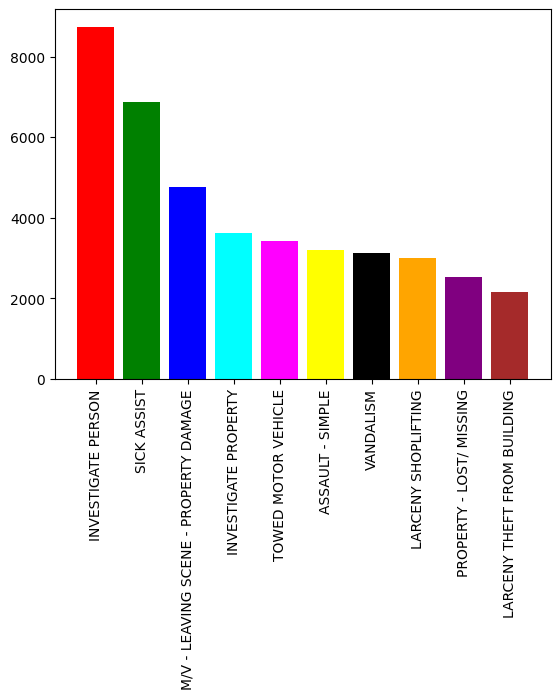

In [7]:
# draw a bar chart of the top 10 crimes using different colors for each crime

# create a list of the top 10 crimes
top_10_crimes = raw_data['OFFENSE_DESCRIPTION'].value_counts().head(10).reset_index().values.tolist()

# draw a bar chart of the top 10 crimes
plt.bar(range(len(top_10_crimes)), [val[1] for val in top_10_crimes], align='center', color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown'])
plt.xticks(range(len(top_10_crimes)), [val[0] for val in top_10_crimes])
plt.xticks(rotation=90)

# save bar chart to file

plt.savefig('../reports/figures/top_10_crimes.png') # need to call this before plt.show() or else it will save a blank image


plt.show()


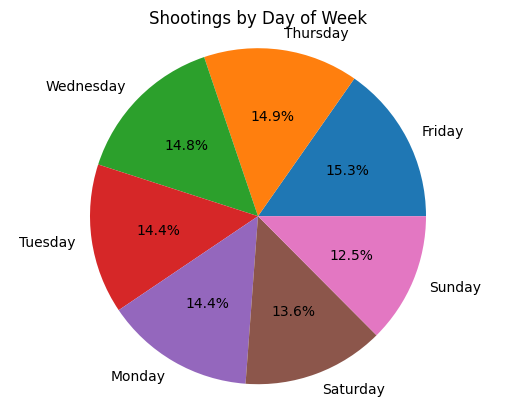

In [8]:
# count shootings by day of week
shootings_by_day = raw_data['DAY_OF_WEEK'].value_counts().reset_index().values.tolist()

# draw a pie chart of shootings by day of week
plt.pie([val[1] for val in shootings_by_day], labels=[val[0] for val in shootings_by_day], autopct='%1.1f%%')
plt.title('Shootings by Day of Week')
plt.axis('equal')

# save pie chart to file
plt.savefig('../reports/figures/shootings_by_day.png')

plt.show()


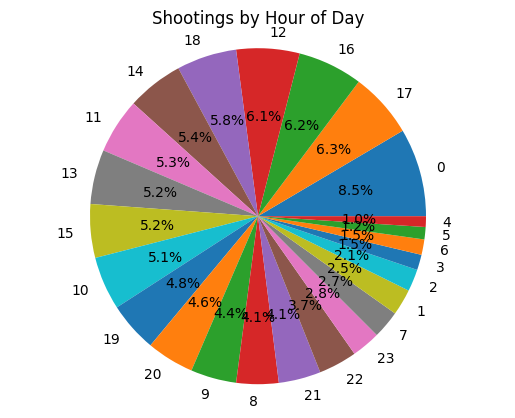

In [9]:
# count shootings by hour of day
shootings_by_hour = raw_data['HOUR'].value_counts().reset_index().values.tolist()

# draw a pie chart of shootings by hour of day
plt.pie([val[1] for val in shootings_by_hour], labels=[val[0] for val in shootings_by_hour], autopct='%1.1f%%')
plt.title('Shootings by Hour of Day')
plt.axis('equal')

# save pie chart to file
plt.savefig('../reports/figures/shootings_by_hour.png')

plt.show()


In [10]:
# show datatype of all columns
print(raw_data.dtypes)

# show dataframe size
print(raw_data.shape)


_id                      int64
INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP     float64
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                 int64
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART               float64
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object
(81133, 18)


### WEEK2 DATA CLEANING

In [11]:
# drop Offense Code group column
raw_data.drop('OFFENSE_CODE_GROUP', axis=1, inplace=True)

# drio UCR_PART column
raw_data.drop('UCR_PART', axis=1, inplace=True)

# drop lat and long and location columns
raw_data.drop('Lat', axis=1, inplace=True)
raw_data.drop('Long', axis=1, inplace=True)
raw_data.drop('Location', axis=1, inplace=True)

# drop incident number column
raw_data.drop('INCIDENT_NUMBER', axis=1, inplace=True)

print(raw_data.shape)


# never run this repeatedly!!!!!!!!!!!!!!!




(81133, 12)


In [12]:
# drop rows with null values]
raw_data.dropna(inplace=True)
raw_data.reset_index(drop=True, inplace=True)
print(raw_data.shape)

(80929, 12)


In [13]:
# save cleaned data to csv
raw_data.to_csv('../data/processed/cleaned_data.csv', index=False)

print('Done!')

Done!


#Week3 
Train test split


In [14]:
# Feature Engineering

data = pd.read_csv('../data/processed/cleaned_data.csv')

# add a new column set default to 0 for all rows
data['Severe_crimes'] = 0

# print the number of 0s in the new column
print(data['Severe_crimes'].value_counts())

# set the value of Sevre_crimes to 1 if the crime involves shooting
data.loc[data['SHOOTING'] == 1, 'Severe_crimes'] = 1

# set the value of Sevre_crimes to 1 if the crime description contains the following words
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('ASSAULT', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('MURDER', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('ARSON', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('KIDNAPPING', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('MANSLAUGHTER', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('BREAKING', case=False), 'Severe_crimes'] = 1


Severe_crimes
0    80929
Name: count, dtype: int64


In [15]:
# save cleaned data to csv
data.to_csv('../data/processed/cleaned_data.csv', index=False)

print('Done!')


Done!
